# **Преобразования планов помещений в координаты опорных точек**

## Общая информация и цель проекта
Компания XRPlace создает интерактивные 3D квартиры и дома для сайтов застройщиков. Это похоже на web игру, где мы показываем планировку и локацию вокруг будущей недвижимости. Это особенно актуально для покупателей из других городов, а также для объектов недвижимости, которые ещё не построены. Это real time 3D в браузере, где можно гулять от первого лица, как в любой компьютерной игре (без ограничений перемещения по точкам, как у 360панорам). Для создания интерактивных 3D визуализаций необходимо по плану помещения получать координаты опорных точек и определять тип помещения для последующей 3D визуализации.

На текущем этапе необходимо создать модель, которая будет по плану изображения выдавать координаты опорных точек.

## Стек
* PyTorch
* YOLO
* Numpy
* matplotlib
* OpenCV

## Результат работы
Модель, которая по плану помещения возвращает список координат углов помещений в заданном формате. 

Рабочая модель находится в пункте Deploy. На вход модель получает путь до изображения, на выходе модель выдает размеченное изображение, координаты углов bbox в виде np.array [[x,y], [x,y] ... [x,y]]. Для работы модели необходим roboflow api key. 

# Imports

In [1]:
!pip install roboflow

In [2]:
!pip install gradio

In [3]:
!pip install ultralytics -q

In [4]:
import cv2
import numpy as np
import torch
import glob
import albumentations as A
import os
import ultralytics
import subprocess
import PIL
import gradio as gr
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from google.colab.patches import cv2_imshow
from pycocotools.coco import COCO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from albumentations.pytorch import ToTensorV2
from IPython.display import Image as IPyImage
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import display, Image

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [5]:
import warnings; warnings.filterwarnings('ignore')

In [6]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
roboflow_api_key = user_secrets.get_secret("roboflow_api")

# **YOLO11 training**

In [7]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [8]:
rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace("stepan-suharev").project("new_plan-sdgqx")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/kaggle/working
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/New_plan-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

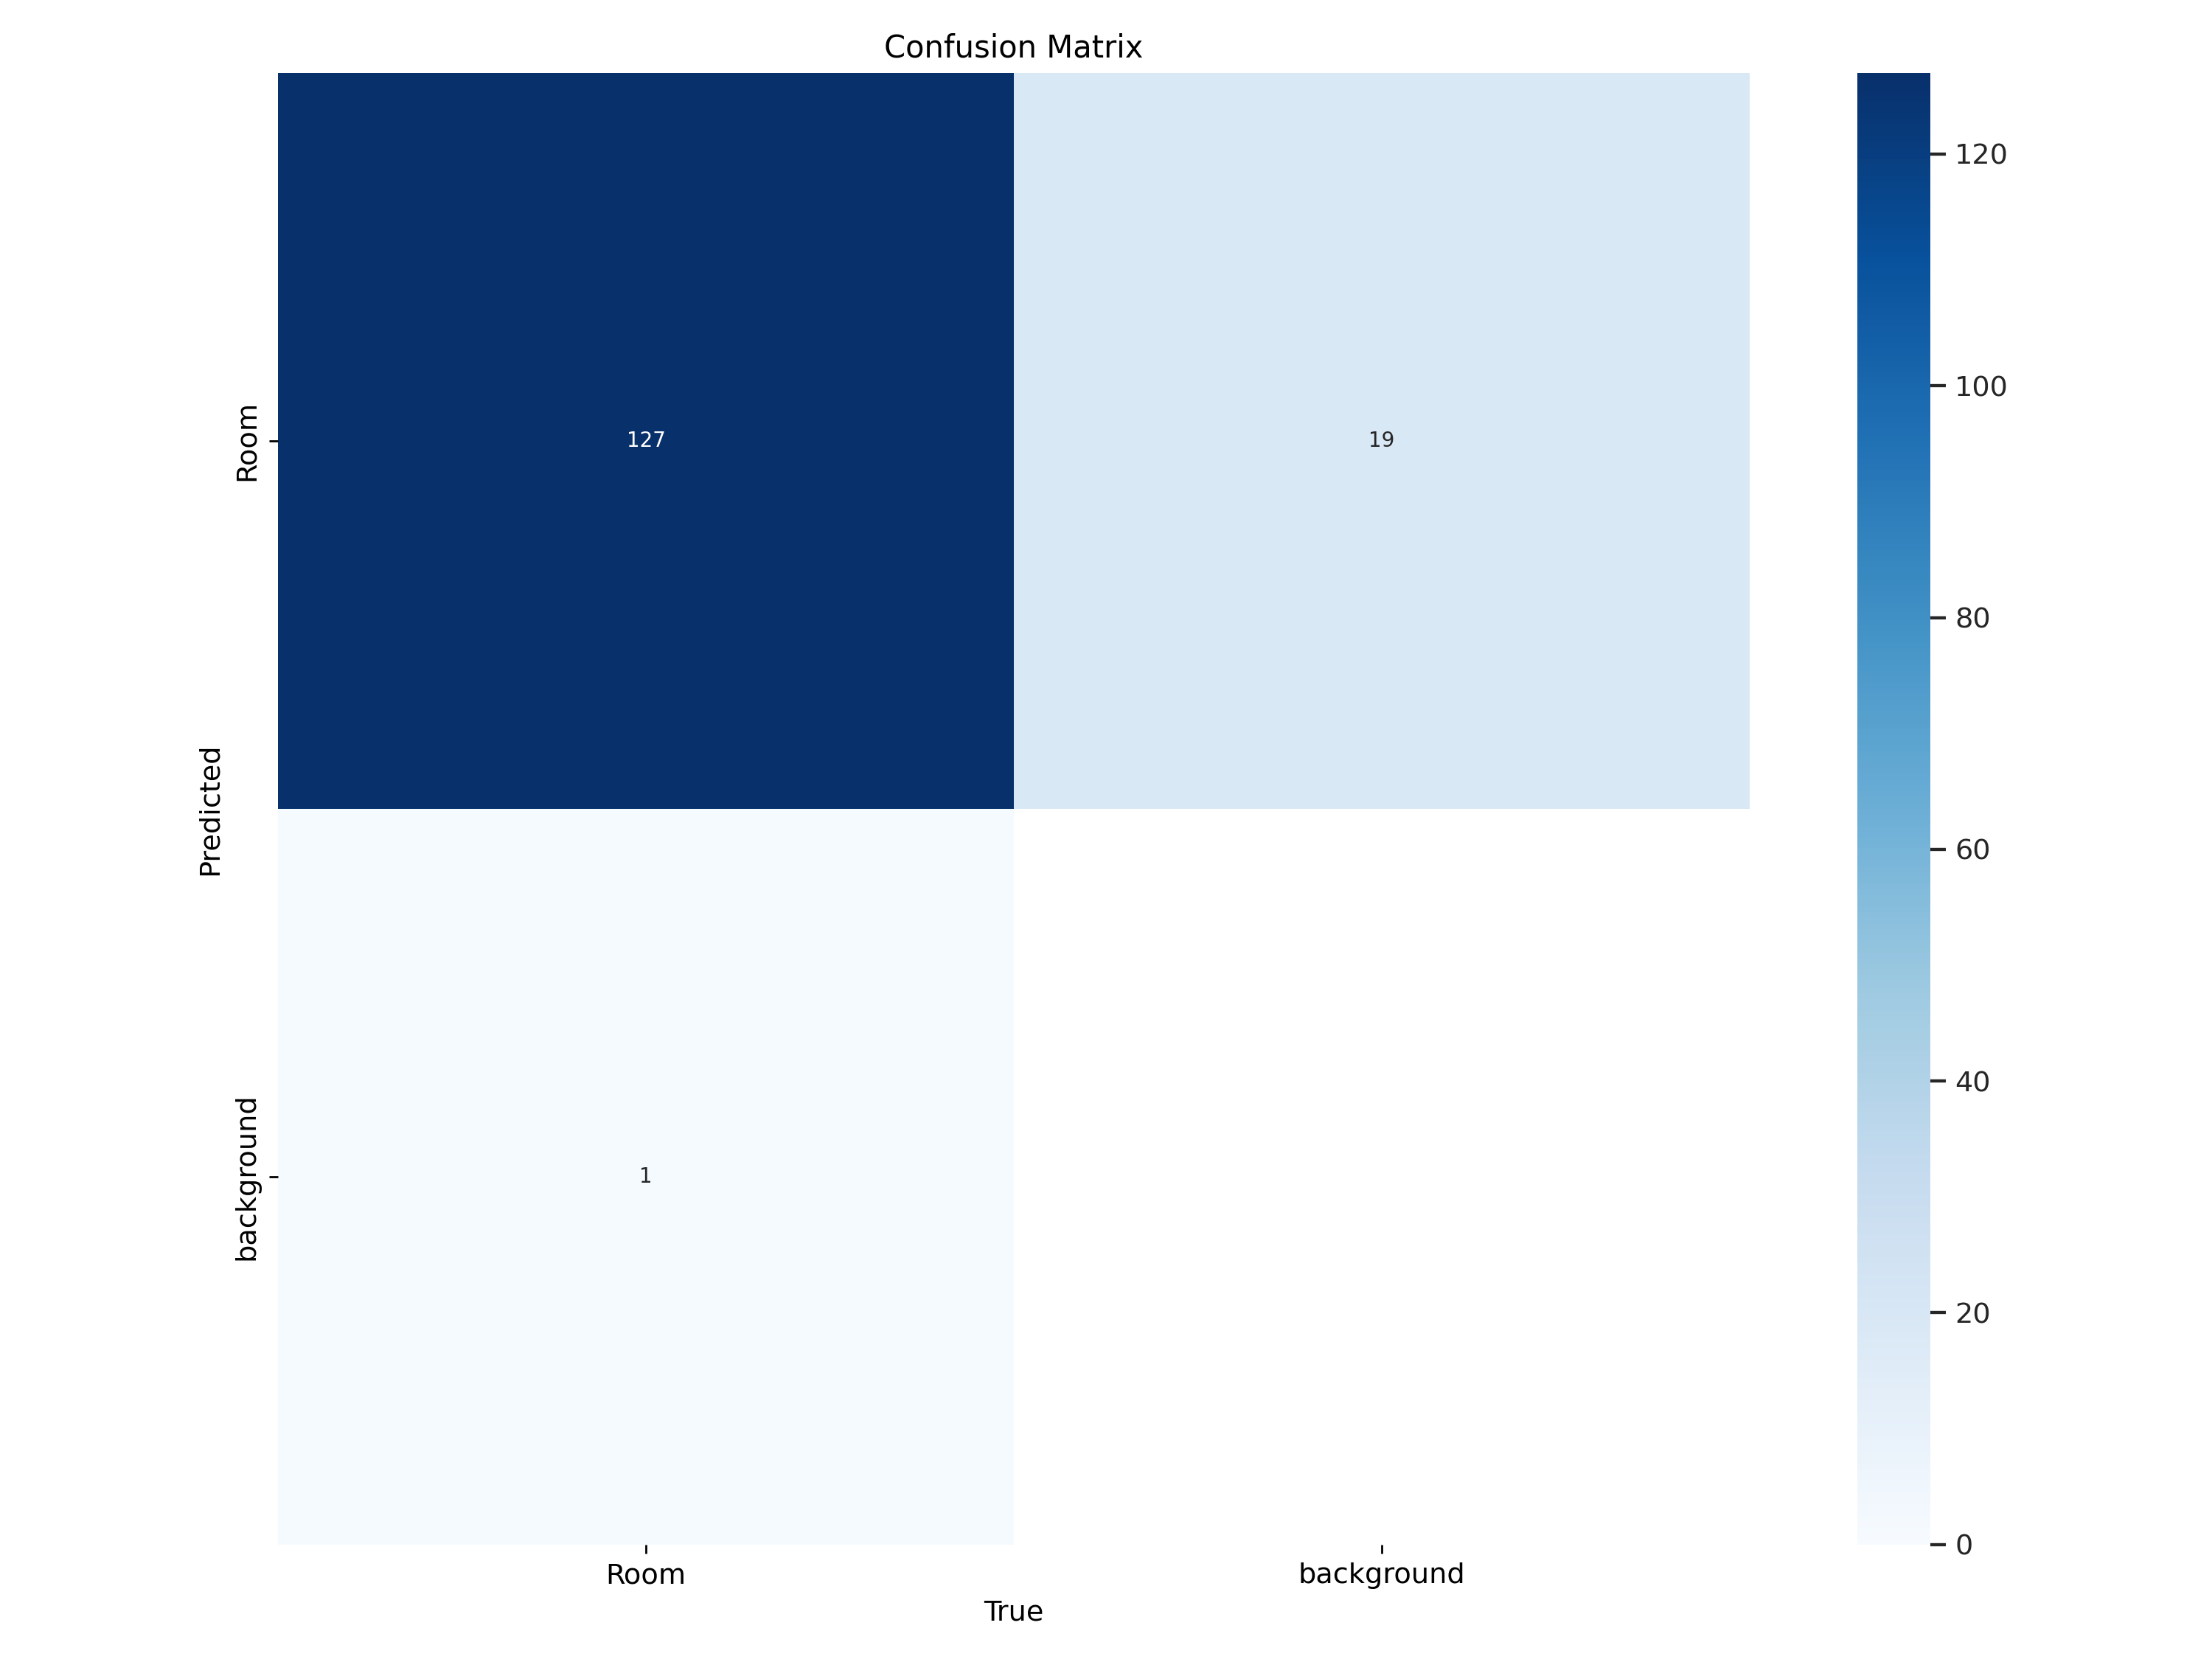

In [10]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

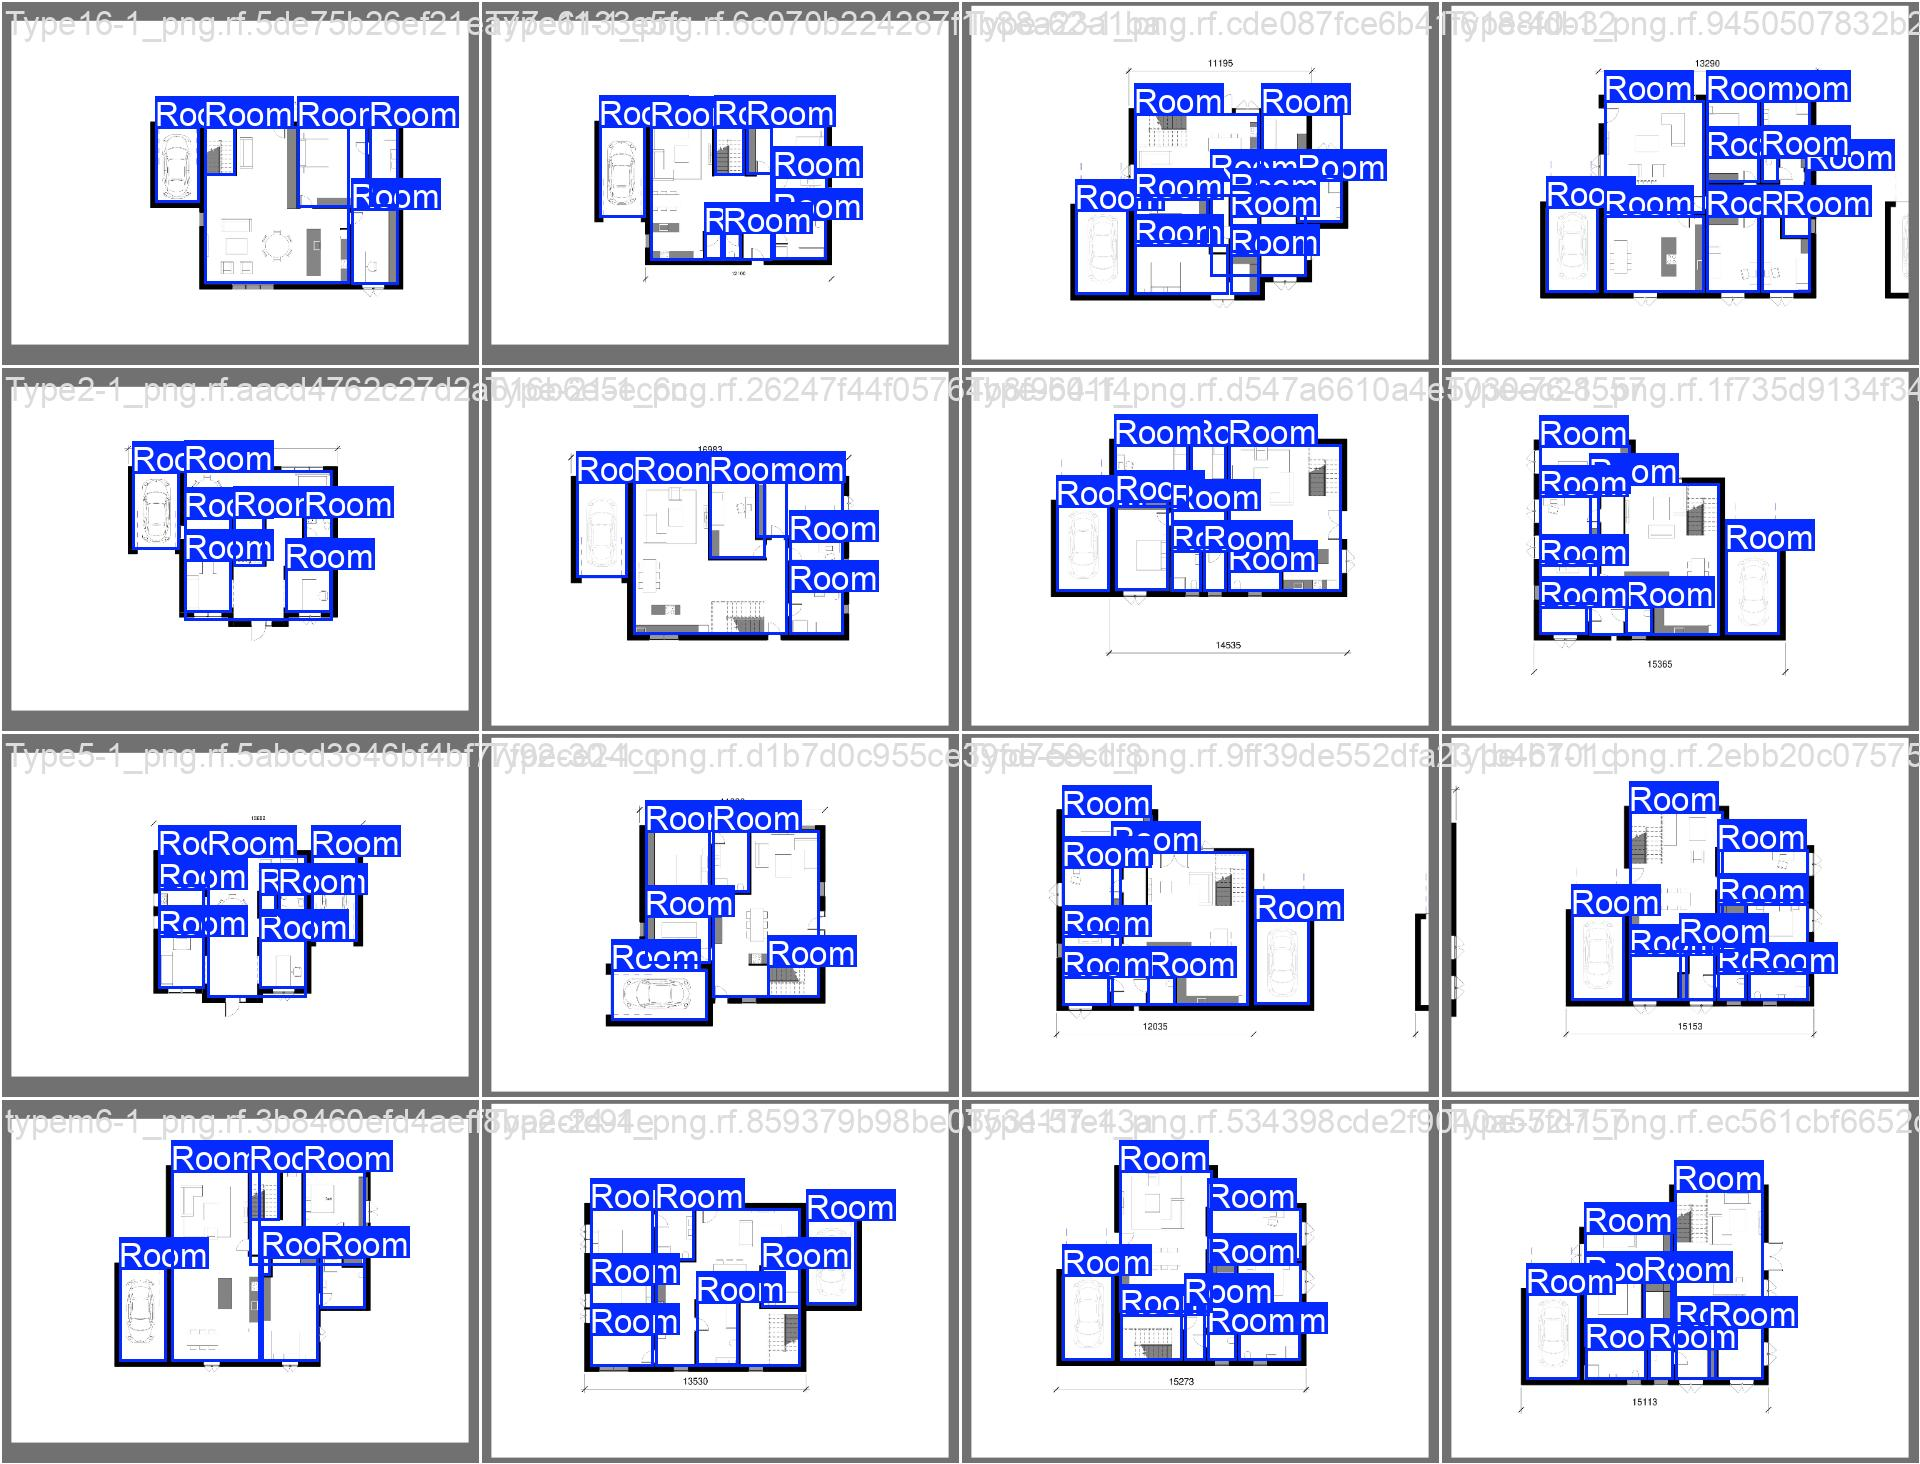

In [11]:
IPyImage(filename=f'/kaggle/working/runs/detect/train/val_batch0_labels.jpg', width=600)

In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/New_plan-1/valid/labels.cache... 16 images, 0 back
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         16        128      0.952      0.984      0.989      0.951
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
Speed: 0.2ms preprocess, 9.5ms inference, 0.0ms loss, 15.9ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True save_txt=True

Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/10 /kaggle/working/New_plan-1/test/images/Type-29-1_png.rf.4ab50dcefaa131b704e26b9f4561e779.jpg: 512x640 11 Rooms, 46.7ms
image 2/10 /kaggle/working/New_plan-1/test/images/Type-36-1_png.rf.882b3c0b10bf64fcd9b62d702cb8ea16.jpg: 512x640 12 Rooms, 12.6ms
image 3/10 /kaggle/working/New_plan-1/test/images/Type-39-1_png.rf.99c5d410eb0b0ea38f76776f7ce4bd77.jpg: 512x640 8 Rooms, 12.5ms
image 4/10 /kaggle/working/New_plan-1/test/images/Type-52-1_png.rf.ce5532c0c5c63e9d2ad9d5bed9631b69.jpg: 512x640 15 Rooms, 12.5ms
image 5/10 /kaggle/working/New_plan-1/test/images/Type-56-1_png.rf.42ece092bd9c401dfa6d24fa8a9e16dd.jpg: 512x640 10 Rooms, 12.5ms
image 6/10 /kaggle/working/New_plan-1/test/images/Type-65-1_png.rf.d22cb149e186fb8800561b1066ae46c6.jpg: 512x640 9 Rooms, 12.5ms
image 7/10 /kaggle/working/New_plan-1/test/images/Type-

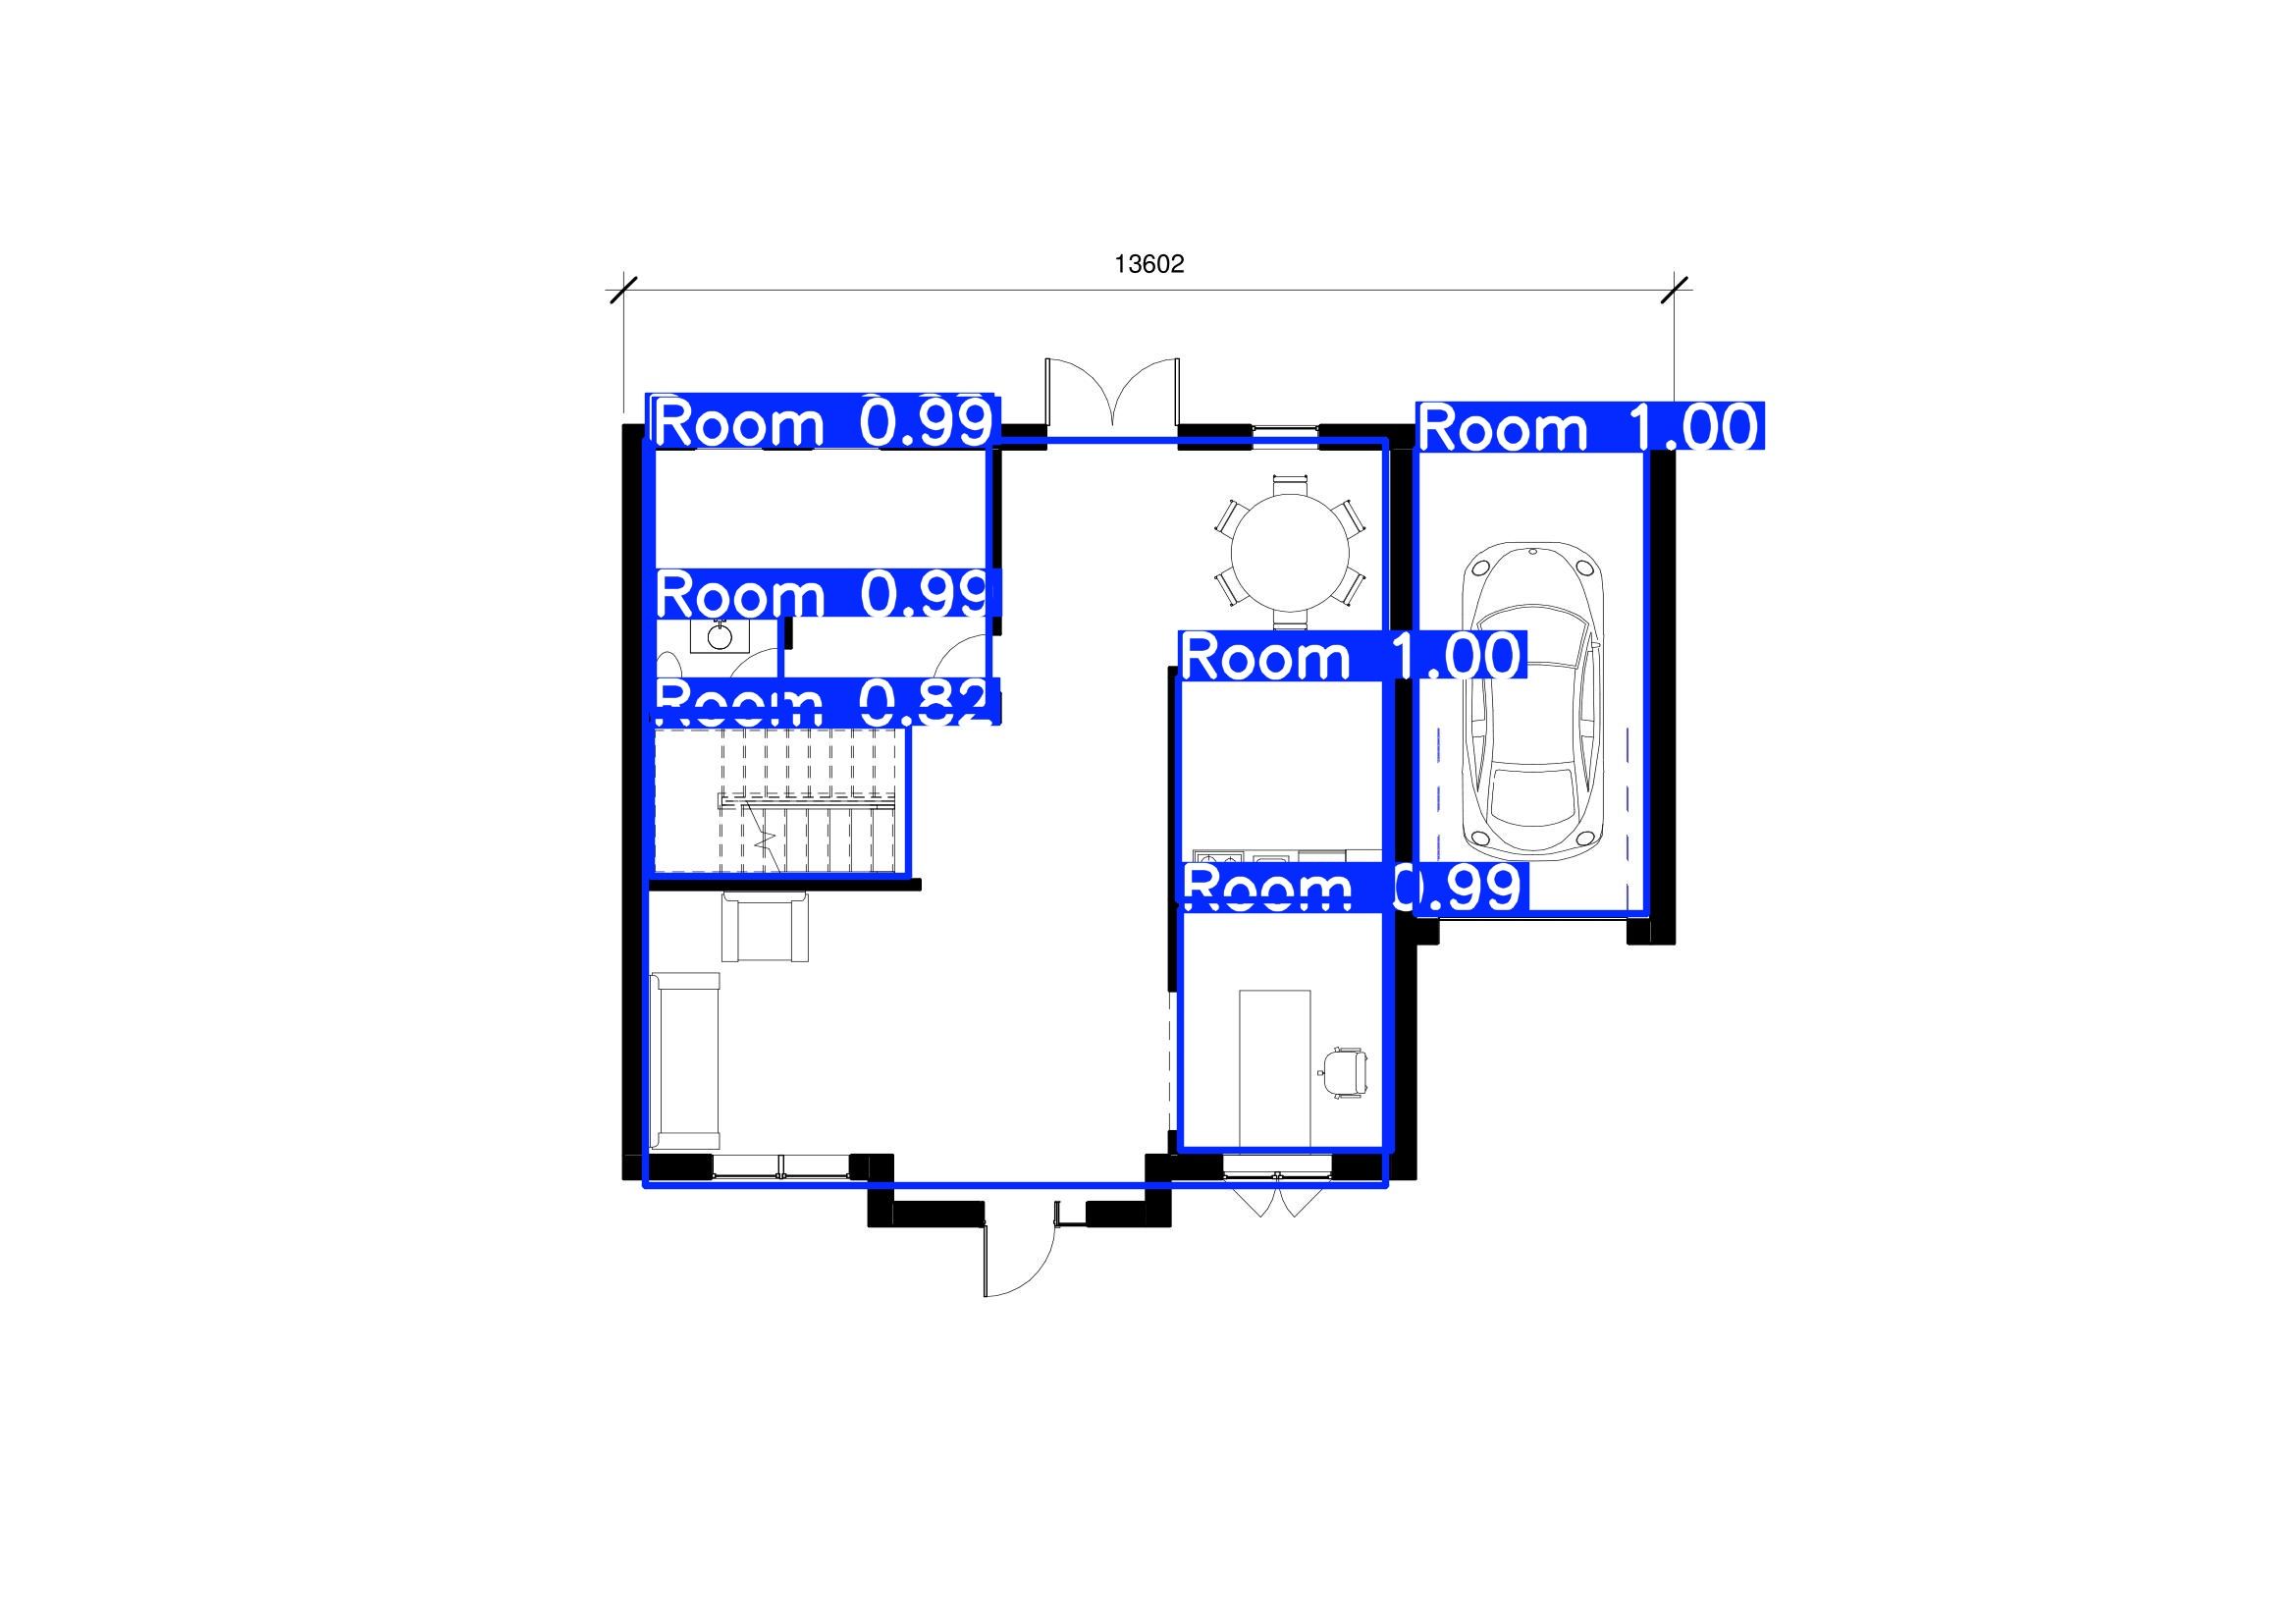

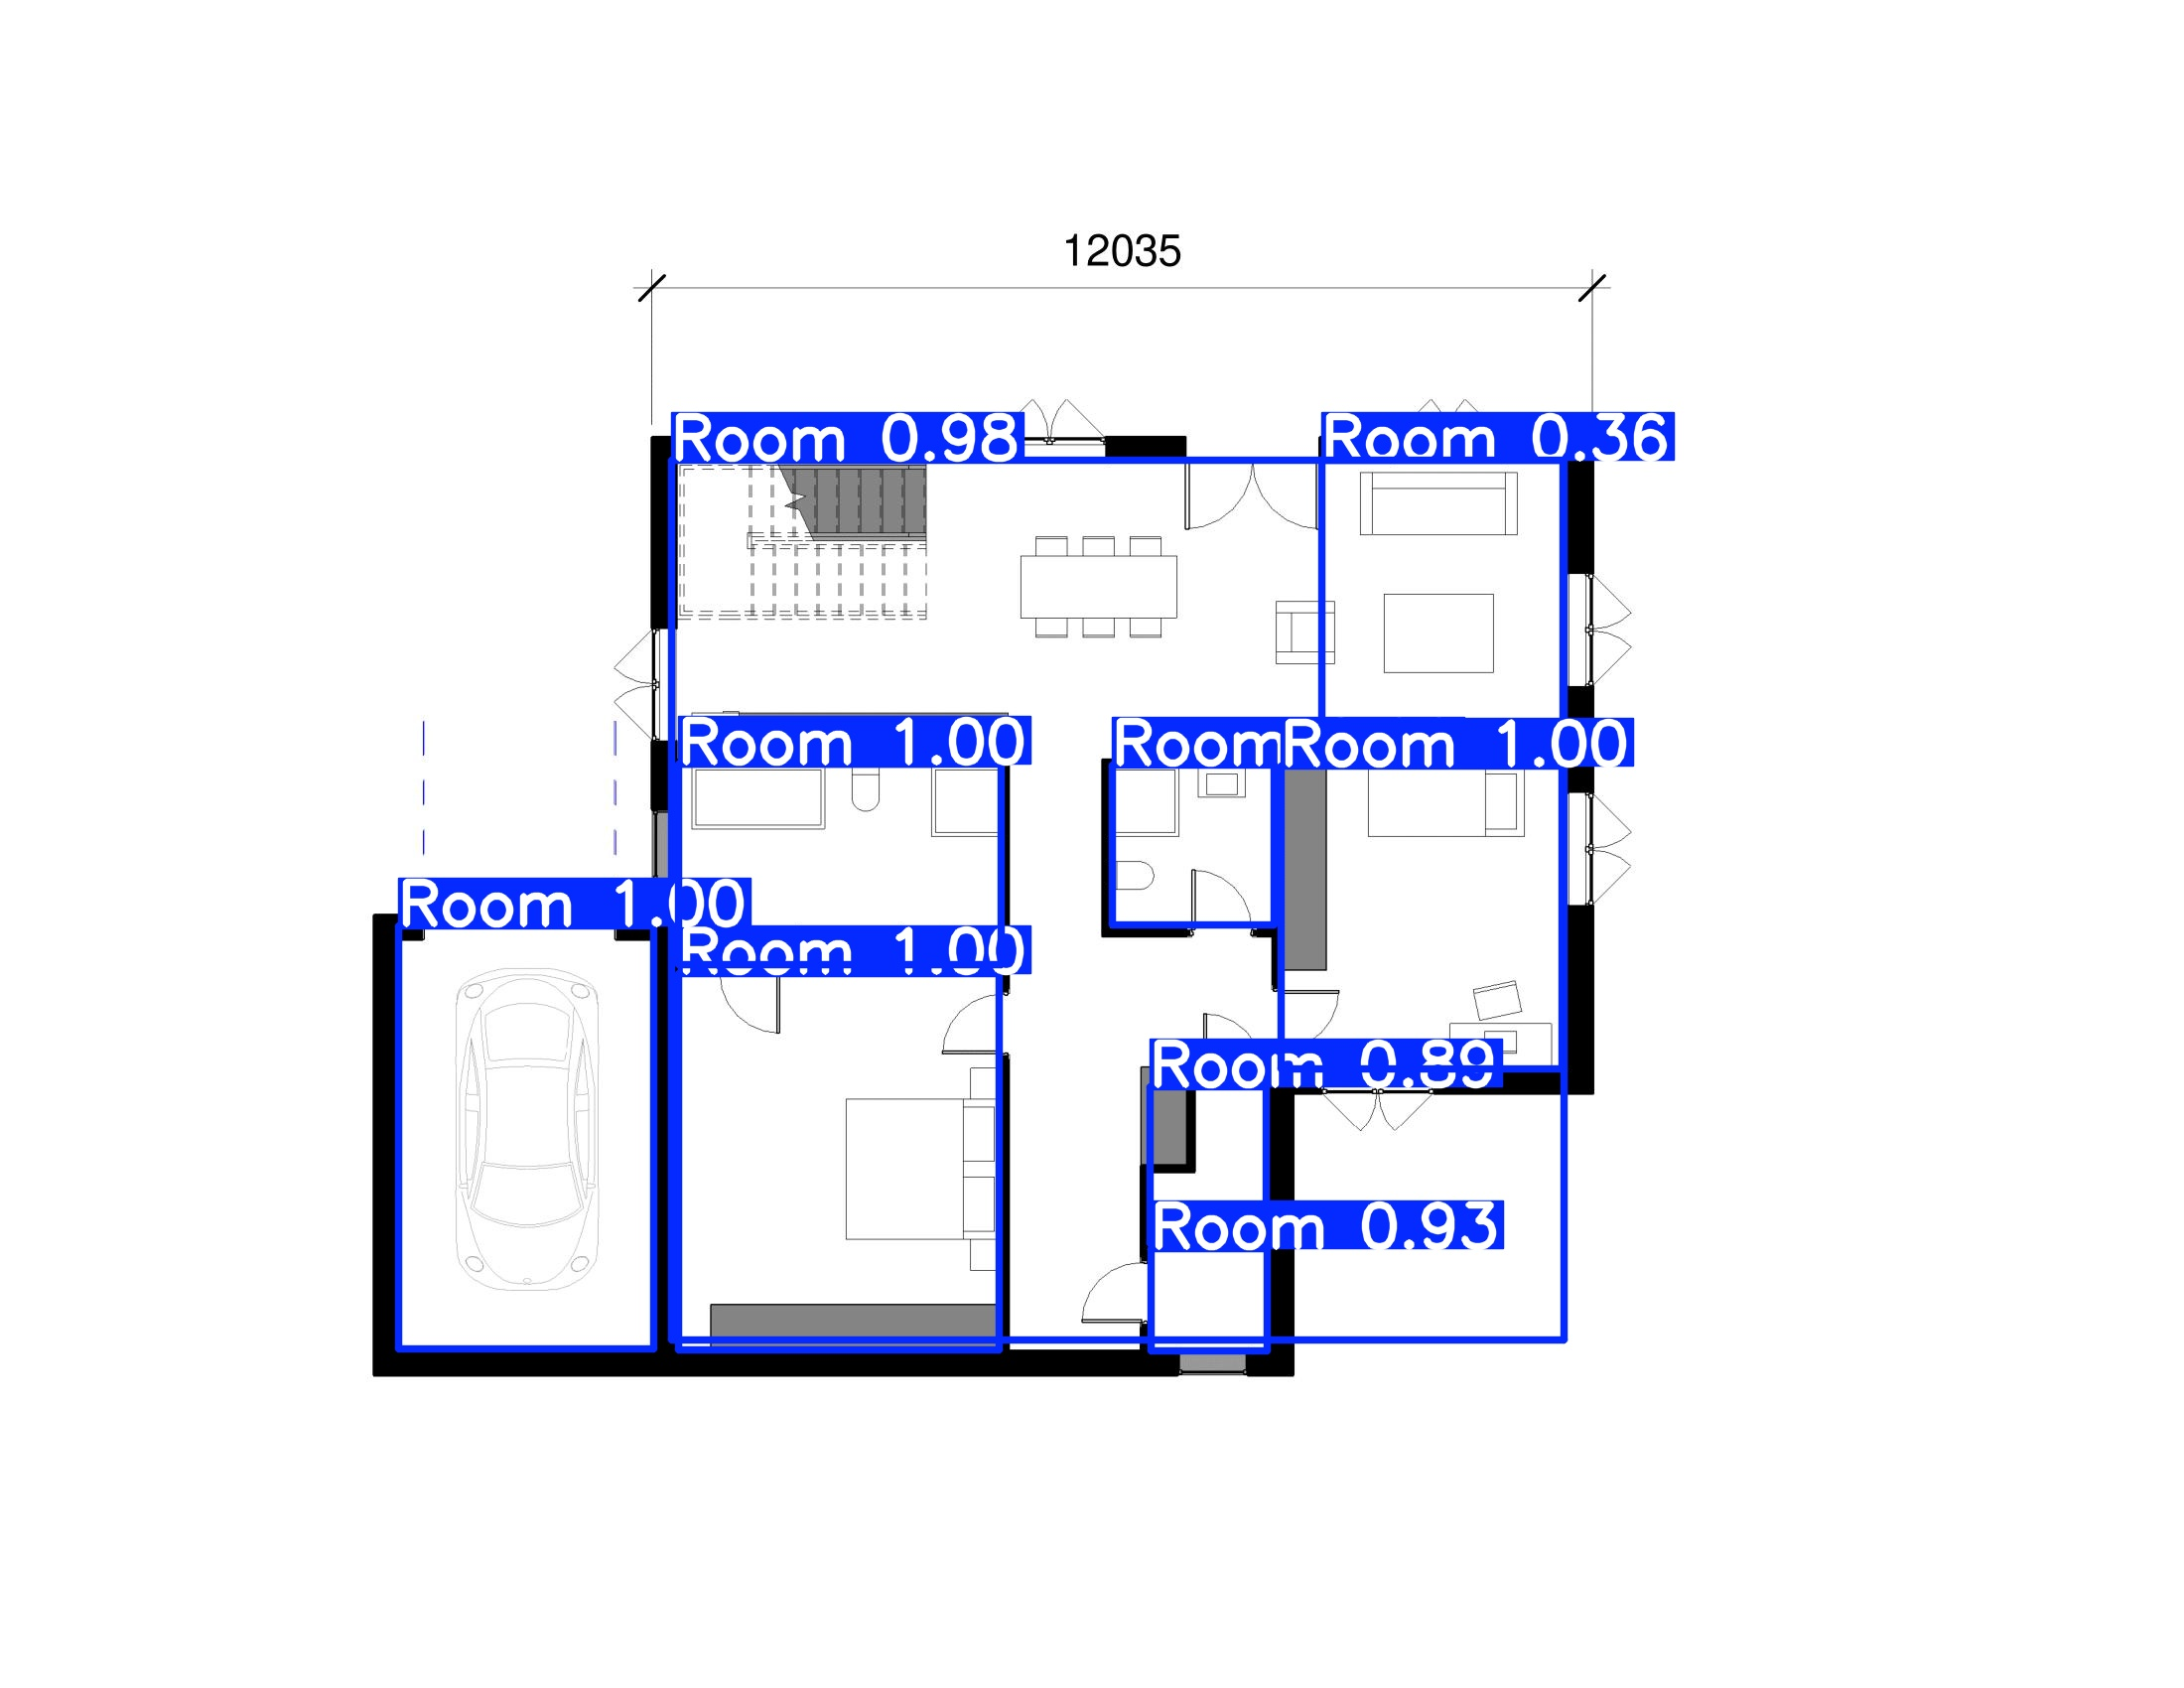

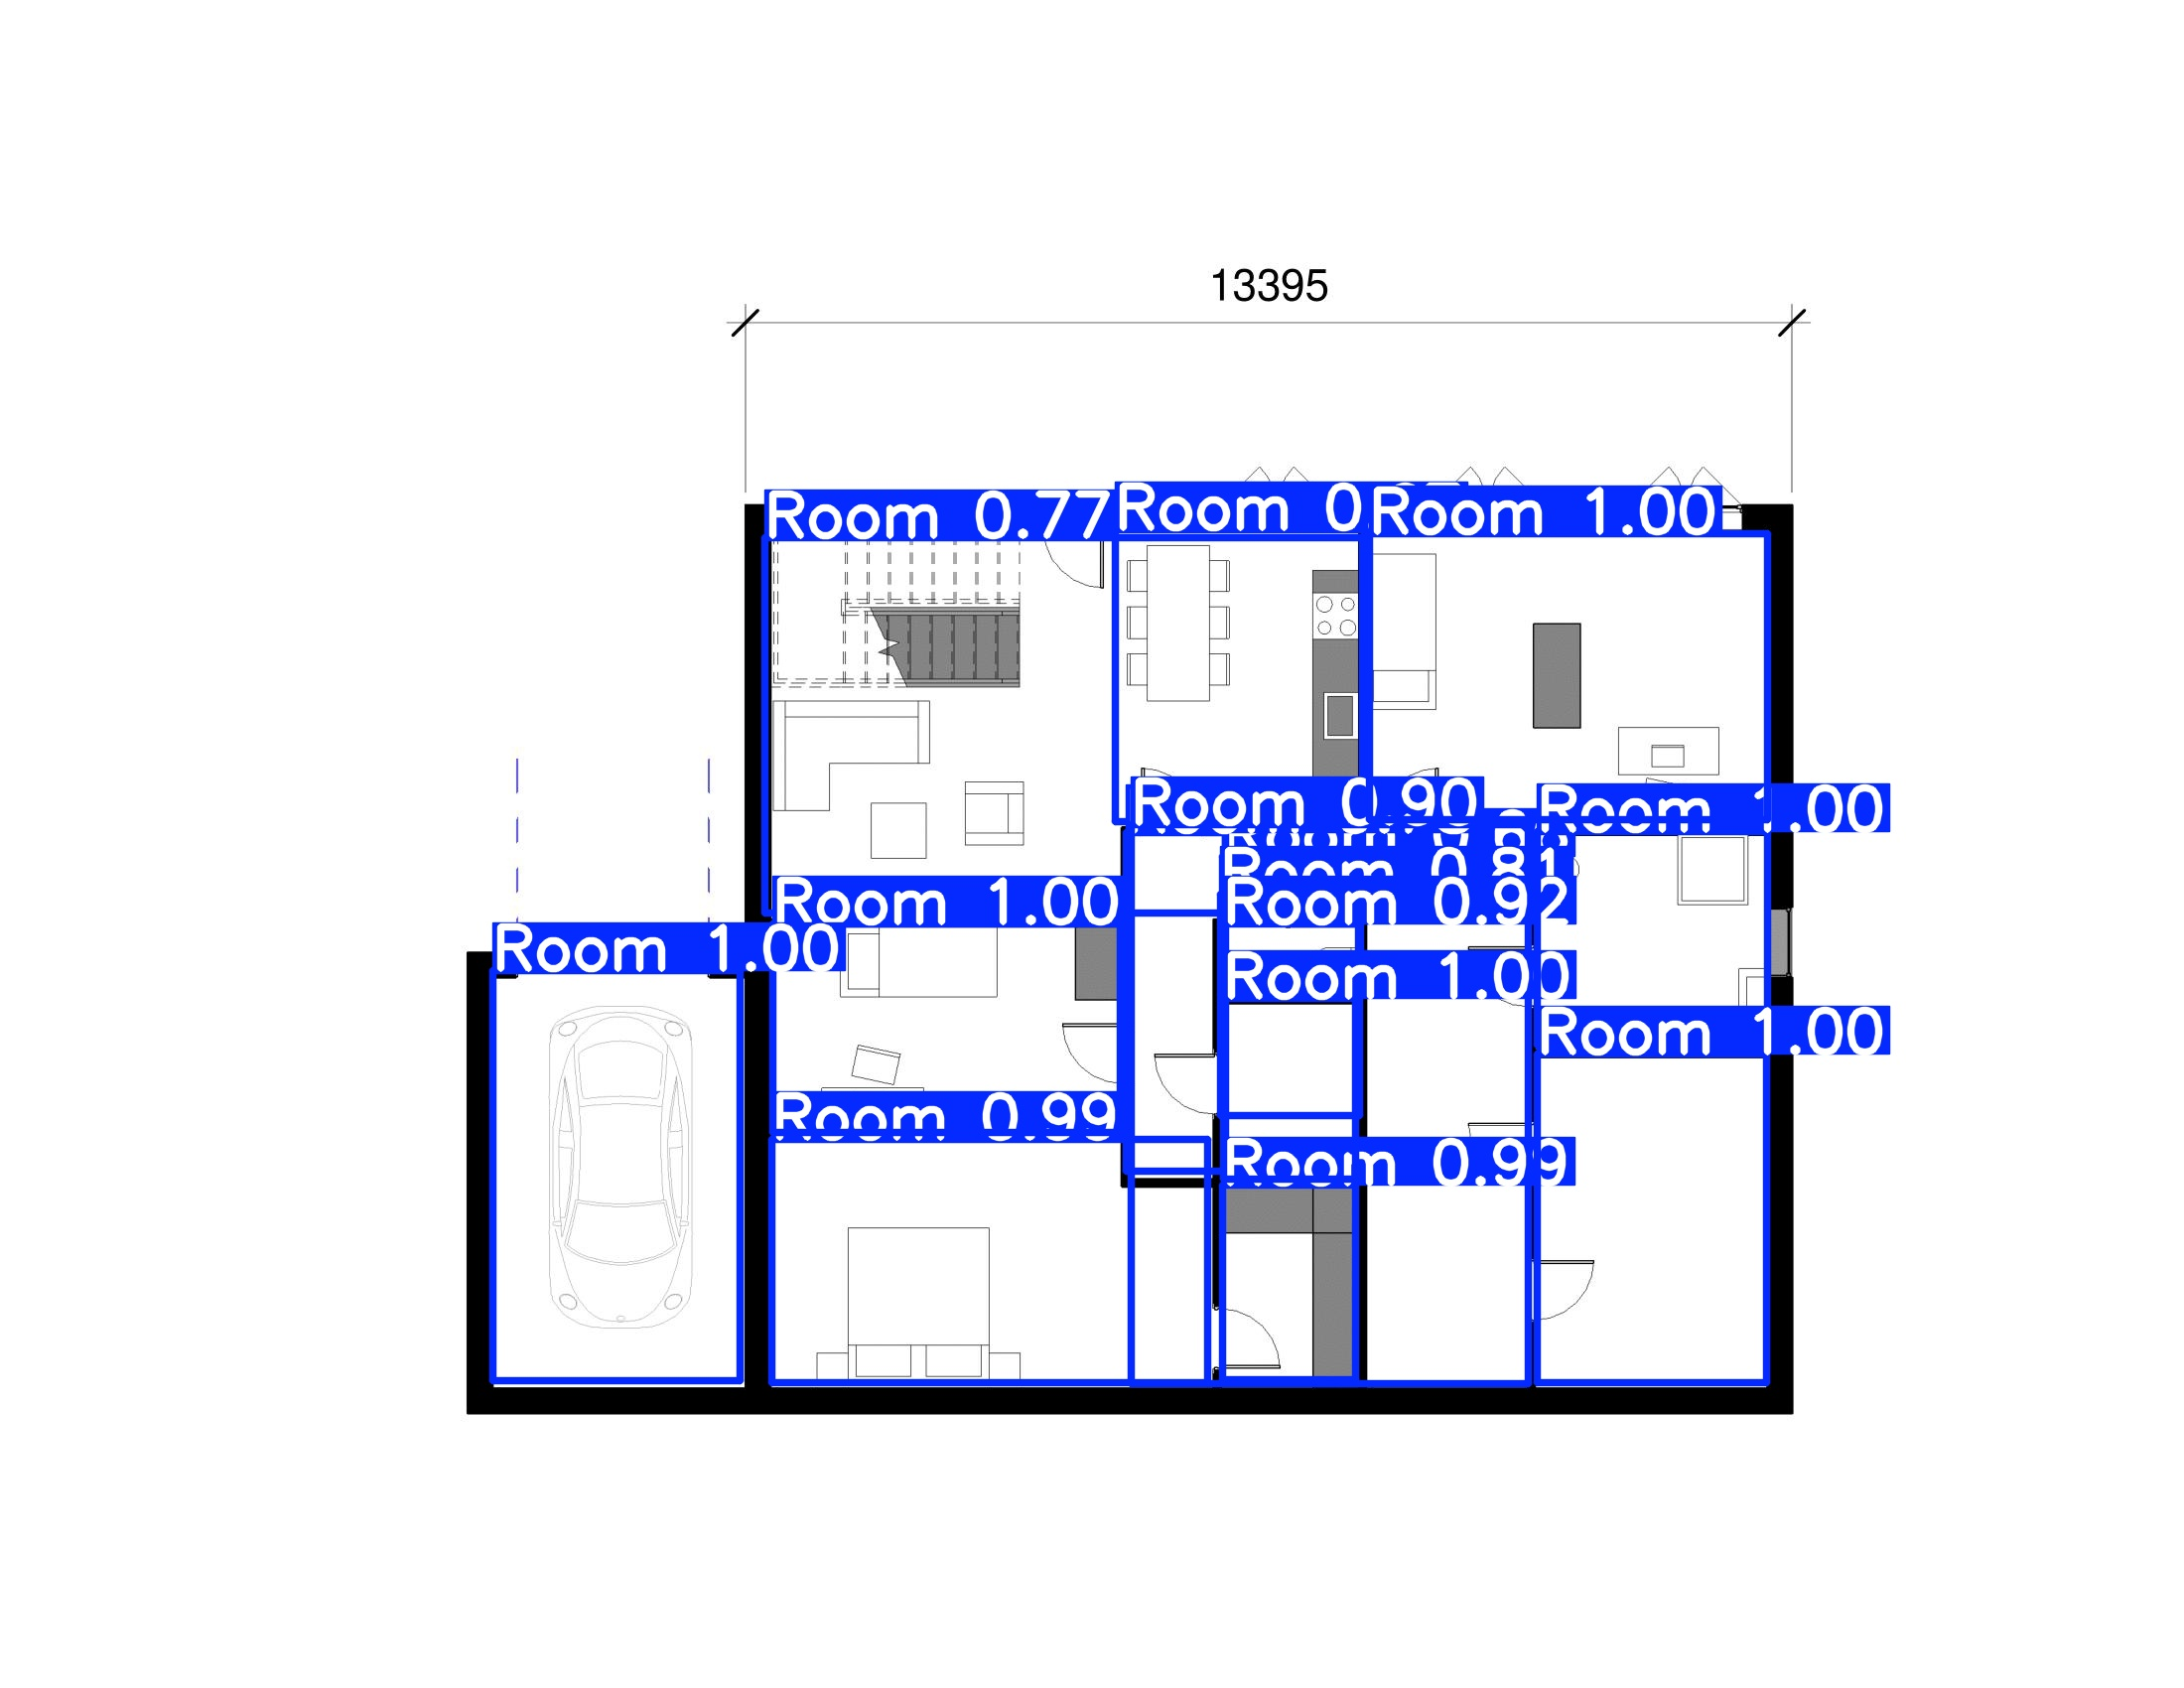

In [14]:
latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

# **Deploy**

In [15]:
# Путь к директории проекта
HOME = os.getcwd()
print(HOME)

# Путь к лучшим весам
WEIGHTS_PATH = f'{HOME}/runs/detect/train/weights/best.pt'

def process_image(image_path):
    """
    Функция для обработки изображения и получения координат углов bbox.
    """

    # Загрузка модели
    model = YOLO(WEIGHTS_PATH)

    # Загрузка изображения
    image = PIL.Image.open(image_path)

    # Выполнение предсказания
    results = model(image)

    # Извлечение координат прямоугольников
    img_with_boxes = np.array(image).copy()  # Копируем изображение для рисования
    all_corners = []

    for result in results:
        boxes = result.boxes
        for box in boxes:
            xyxy = box.xyxy[0].tolist()
            x1, y1, x2, y2 = map(int, xyxy)

            # Сохранение координат углов
            corners = np.array([
                [x1, y1],  # Левый верхний угол
                [x2, y1],  # Правый верхний угол
                [x2, y2],  # Правый нижний угол
                [x1, y2]   # Левый нижний угол
            ])

            # Добавление в общий список
            all_corners.append(corners)

            # Рисование прямоугольника
            cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Вывод изображения с bbox
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.show()

    # Вывод координат углов
    print("Координаты углов bbox:")
    print(np.array(all_corners).tolist())

# Создание интерактивного интерфейса
image_path_widget = widgets.Text(value="", placeholder="Введите путь к изображению", description="Путь к изображению:", disabled=False)

interact(process_image, image_path=image_path_widget)

/kaggle/working


interactive(children=(Text(value='', description='Путь к изображению:', placeholder='Введите путь к изображени…

<function __main__.process_image(image_path)>